## <font color="blue">Preparação e Pré-processamento de Dados para Análise Preditiva entre Jogos Indie e Multi-A</font>

### <font color="red"><i>Análise Exploratória</i></font>
##### <font color="black">Neste Notebook o grupo realiza as alterações necessárias no Dataset mantém apenas as informações úteis e retirando valores inválidos</font>
#### <font color="black"> Atualizações: 
##### 21/09/2024 - Henrique Magno dos Santos - Remover valores nulos [8]
##### 21/09/2024 - Henrique Magno dos Santos - Removeu valores nulos de avgPlaytime [48]
##### 21/09/2024 - Gabriel de França Marques - Removeu publisherClass Hobbyist por só ter uma entrada [32]
##### 21/09/2024 - Pedro Machado Gomes Caixeta - Removeu a coluna steamID por não ter relevância nos resultados [35]
##### 21/09/2024 - Gabriel de França Marques - Em One-Hot encoding utilizamos publisherClass
### <font color="black" size='3'><b>Grupo em ordem alfabética (máx. 3 alunos) </b></font>
<html>
<table border="1px">
<tr>
<td bgcolor="Aquamarine">Nome do Aluno</td>
<td bgcolor="Aquamarine">RA</td>
</tr>
<tr>
<td bgcolor="white">Gabriel de França Marques</td>
<td bgcolor="white">10395270</td>
</tr>
<tr>
<td bgcolor="white">Henrique Magno dos Santos</td>
<td bgcolor="white">10335286</td>
</tr>
    <tr>
<td bgcolor="white">Pedro Machado Gomes Caixeta</td>
<td bgcolor="white">10314309</td>
</tr>
    </table>
</html>

# Preparação dos dados

In [1]:
import sklearn as sl
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
sl.__version__

'1.5.2'

## Revisando a Análise Exploratória dos Dados: 
## Estatística Descritva

In [2]:
# Carregando arquivo csv usando Pandas (método que usaremos neste notebook)
# Leitura do arquivo CSV com separador "," e codificação UTF-8
dfsteam = pd.read_csv('Steam_2024_bestRevenue_1500.csv', sep = ',', encoding = 'UTF-8')

In [3]:
# Mostra os 5 primeiros registros (objetos)
dfsteam.head()

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830


In [4]:
# Apresenta os dados dos três objetos iniciais
dfsteam.head(3)

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940


In [5]:
# apresenta os tipos de dados dos atriutos do dataset
dfsteam.dtypes

name               object
releaseDate        object
copiesSold          int64
price             float64
revenue           float64
avgPlaytime       float64
reviewScore         int64
publisherClass     object
publishers         object
developers         object
steamId             int64
dtype: object

In [6]:
# Mostra a dimensão (total de registros)
dfsteam.shape

(1500, 11)

In [7]:
# Detecta registros (objetos) - Nulos (NaN)
# Observe que há objetos contendo o condomínio nulo. Neste caso, vamos removê-los.
dfsteam.isnull().sum()

name              0
releaseDate       0
copiesSold        0
price             0
revenue           0
avgPlaytime       0
reviewScore       0
publisherClass    0
publishers        1
developers        2
steamId           0
dtype: int64

In [8]:
# Remove rows with null values in the DataFrame
dfsteam = dfsteam.dropna()

# Verifique se os registros nulos foram removidos
print(dfsteam.isnull().sum())

name              0
releaseDate       0
copiesSold        0
price             0
revenue           0
avgPlaytime       0
reviewScore       0
publisherClass    0
publishers        0
developers        0
steamId           0
dtype: int64


In [9]:
# Verifica se há registros (objetos) duplicados
dfsteam.duplicated().sum()

np.int64(0)

In [10]:
# Groupby por developers
dfsteam.groupby('developers').size()

developers
0 Deer Soft               1
1000 Orks                 1
101XP GAME STUDIOS        1
14 Hours Productions      1
18bitStudio               1
                         ..
蒸汽满满工作室                   1
雪山雞白郎,SnowGBL             1
零创游戏(ZerocreationGame)    1
雷鸣工作室                     1
香港商河洛互動娛樂股份有限公司           1
Length: 1405, dtype: int64

In [11]:
# Groupby pelo publishers
dfsteam.groupby('publishers').size()

publishers
0 Deer Soft Partnership                  1
072 Project                             14
101XP                                    1
11 bit studios                           3
14 Hours Productions,Astrolabe Games     1
                                        ..
老乌贼工作室                                   1
致意                                       1
蒸汽满满工作室                                  1
零创游戏(ZerocreationGame),2P Games          1
雷鸣工作室                                    1
Length: 1131, dtype: int64

In [12]:
# Groupby pelas copiesSold
dfsteam.groupby('copiesSold').size()

copiesSold
593         1
700         1
710         1
725         1
827         1
           ..
9877443     1
11905198    1
15517278    1
16704850    1
30739148    1
Length: 1457, dtype: int64

In [13]:
# Groupby por price
dfsteam.groupby('price').size()

price
0.00      85
1.99       5
2.00       1
2.99      18
3.49       1
3.50       1
3.99      21
4.99      60
5.49       1
5.99      27
6.50       1
6.99      61
7.00       1
7.99      50
8.99      30
9.25       1
9.79       1
9.90       1
9.99     134
10.99     25
11.99     50
12.00      1
12.45      1
12.49      2
12.99     56
13.99     17
14.99    153
15.99     26
16.99     20
17.76      1
17.90      1
17.99     33
18.35      1
18.99     12
19.99    230
20.00      2
20.99      1
21.99      3
22.99      5
23.99      2
24.99    116
25.00      1
25.50      1
26.99      1
27.99      2
29.99     91
32.00      1
32.99      1
33.32      1
34.99     26
35.01      1
39.99     48
44.99      5
49.99     23
54.99      3
59.99     23
69.99     10
99.99      1
dtype: int64

In [14]:
# Groupby por revenue
dfsteam.groupby('revenue').size()

revenue
20674.0        1
20723.0        1
20922.0        1
20946.0        1
20955.0        1
              ..
111478291.0    1
217017892.0    1
392328553.0    1
435635596.0    1
837793356.0    1
Length: 1494, dtype: int64

In [15]:
# Groupby por avgPlayTime
dfsteam.groupby('avgPlaytime').size()

avgPlaytime
0.000000      1
0.549644      1
0.628550      1
0.633411      1
0.671745      1
             ..
239.439797    1
256.335003    1
260.340509    1
271.614628    1
296.332852    1
Length: 1497, dtype: int64

In [16]:
# Groupby por reviewScore
dfsteam.groupby('reviewScore').size()

reviewScore
0      99
11      1
15      1
24      3
25      1
       ..
96     46
97     52
98     38
99     32
100    10
Length: 72, dtype: int64

In [17]:
# Groupby por publisherClass
dfsteam.groupby('publisherClass').size()

publisherClass
AA        146
AAA        52
Indie    1299
dtype: int64

In [18]:
# Groupby por steamId
dfsteam.groupby('steamId').size()

steamId
24880      1
251570     1
269770     1
290100     1
315210     1
          ..
3067200    1
3088410    1
3089130    1
3091390    1
3107330    1
Length: 1497, dtype: int64

In [19]:
# Sumário estatístico
dfsteam.describe()

,copiesSold,price,revenue,avgPlaytime,reviewScore,steamId
count,1.497000e+03,1497.000000,1.497000e+03,1497.000000,1497.000000,1.497000e+03
mean,1.417444e+05,17.531263,2.637561e+06,12.580062,76.205745,2.184222e+06
std,1.133877e+06,12.649514,2.783787e+07,21.559777,24.342595,6.060862e+05
min,5.930000e+02,0.000000,2.067400e+04,0.000000,0.000000,2.488000e+04
25%,4.922000e+03,9.990000,4.551800e+04,3.571454,72.000000,1.793090e+06
50%,1.197200e+04,14.990000,1.099730e+05,6.763299,83.000000,2.321880e+06
75%,3.831300e+04,19.990000,4.571630e+05,13.108251,92.000000,2.693730e+06
max,3.073915e+07,99.990000,8.377934e+08,296.332852,100.000000,3.107330e+06


In [20]:
df_numeric = dfsteam.select_dtypes(include=[float, int])
correlation_matrix = df_numeric.corr(method='pearson')

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

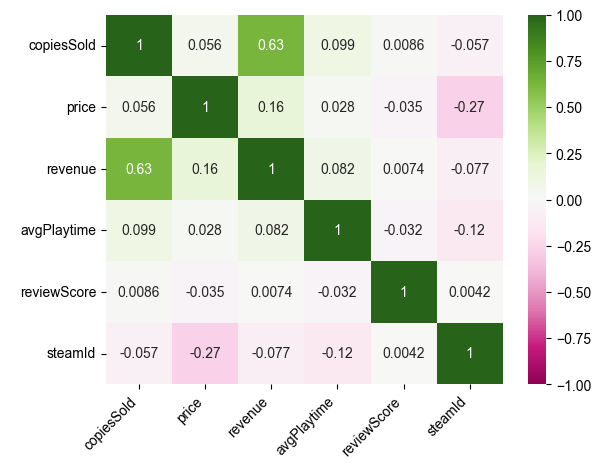

In [22]:
# Apresenta o mapa de calor em da correlação
import seaborn as sns
ax = sns.heatmap(df_numeric.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap = "PiYG")
sns.set(rc={'figure.figsize':(5,5)})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45, # rotaciona o eixo y 45o
    horizontalalignment='right' 
);

In [23]:
df_numeric = dfsteam.select_dtypes(include=[float, int])
skew_values = df_numeric.skew()
print(skew_values)

copiesSold     18.600942
price           1.577119
revenue        22.897228
avgPlaytime     7.164740
reviewScore    -2.049449
steamId        -0.796613
dtype: float64


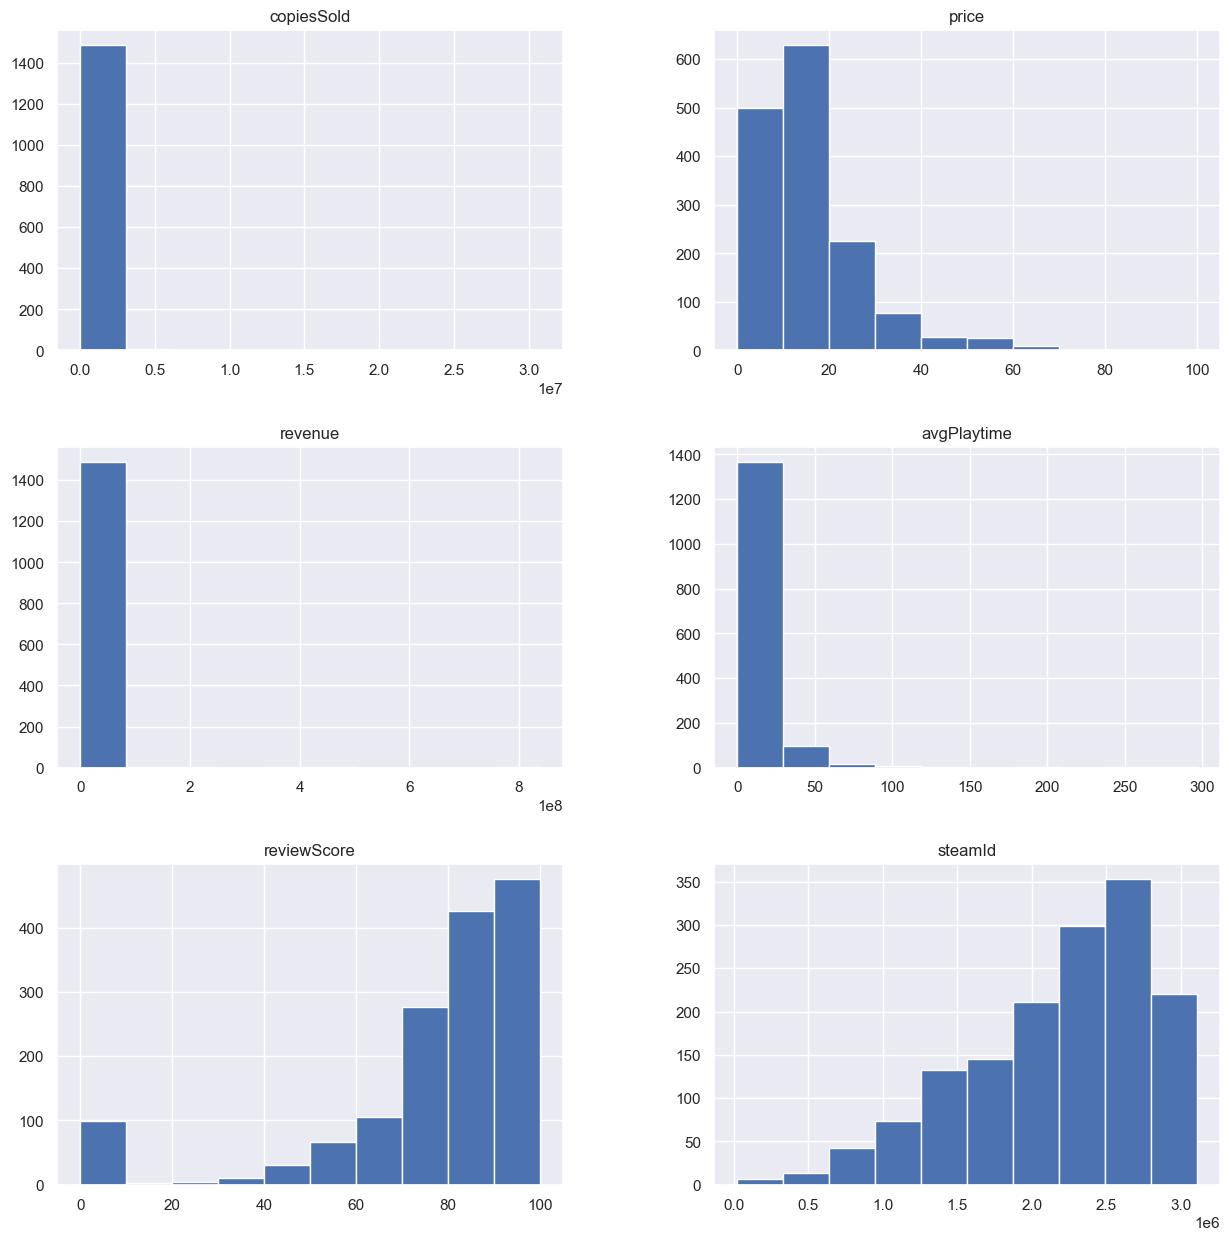

In [24]:
# Histograma Univariado
dfsteam.hist(figsize=(15, 15)).all()

plt.show()

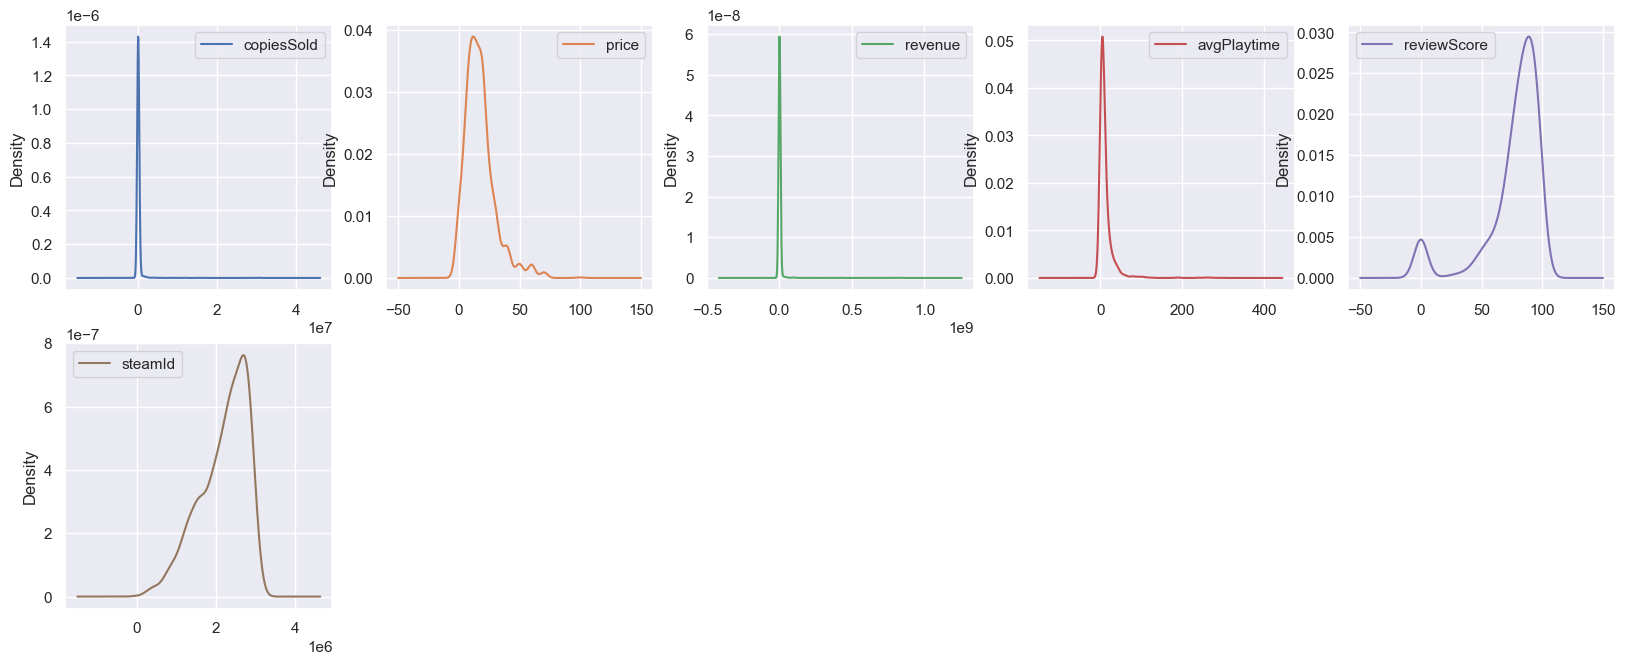

In [25]:
# Density Plot Univariado
dfsteam.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, figsize=(20,20))

plt.show()

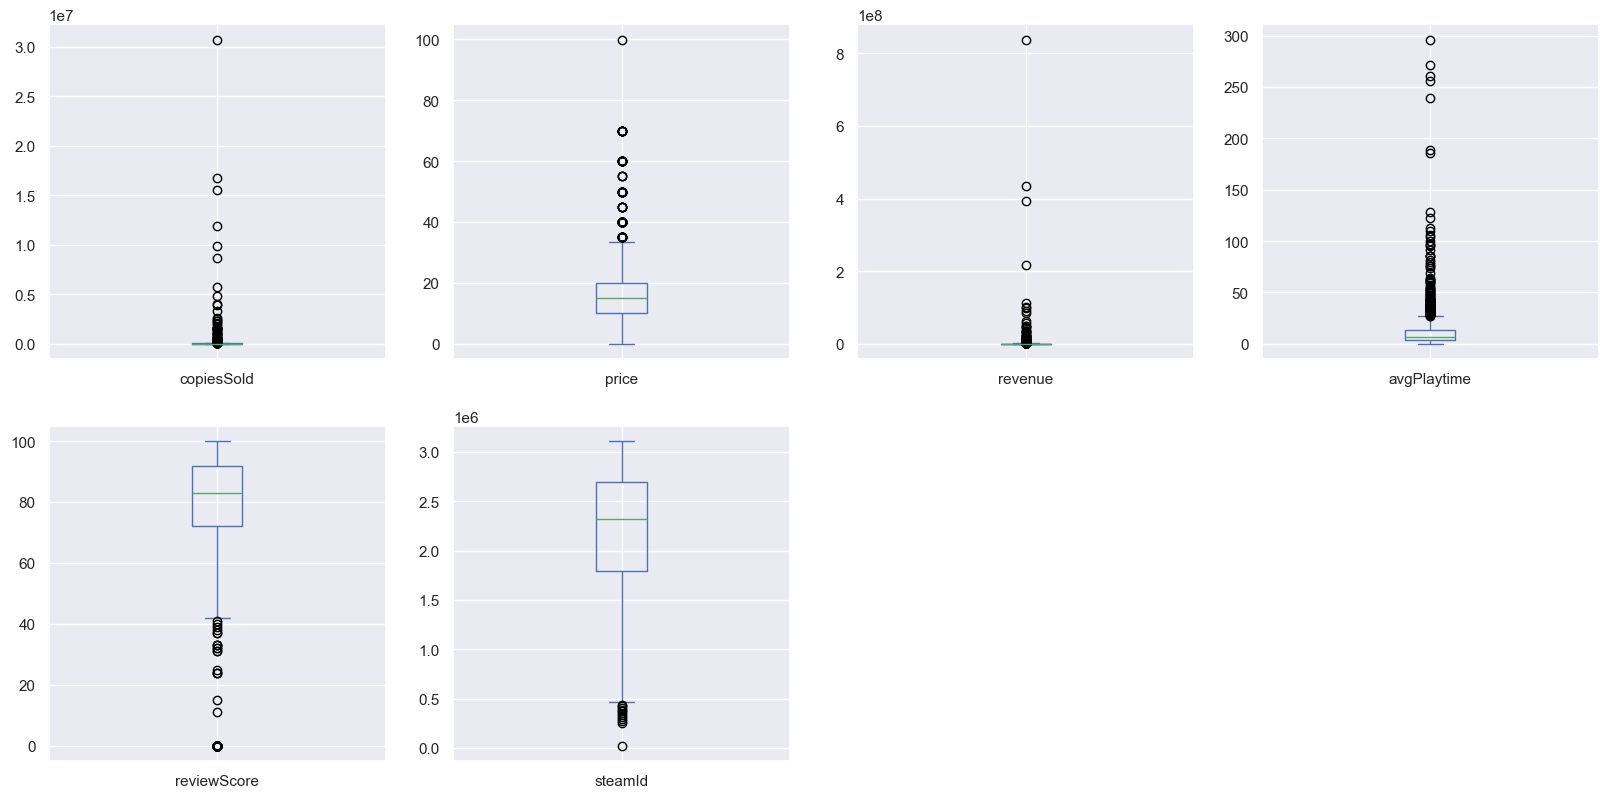

In [26]:
# Box and Whisker Plots
dfsteam.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize=(20,20))

plt.show()

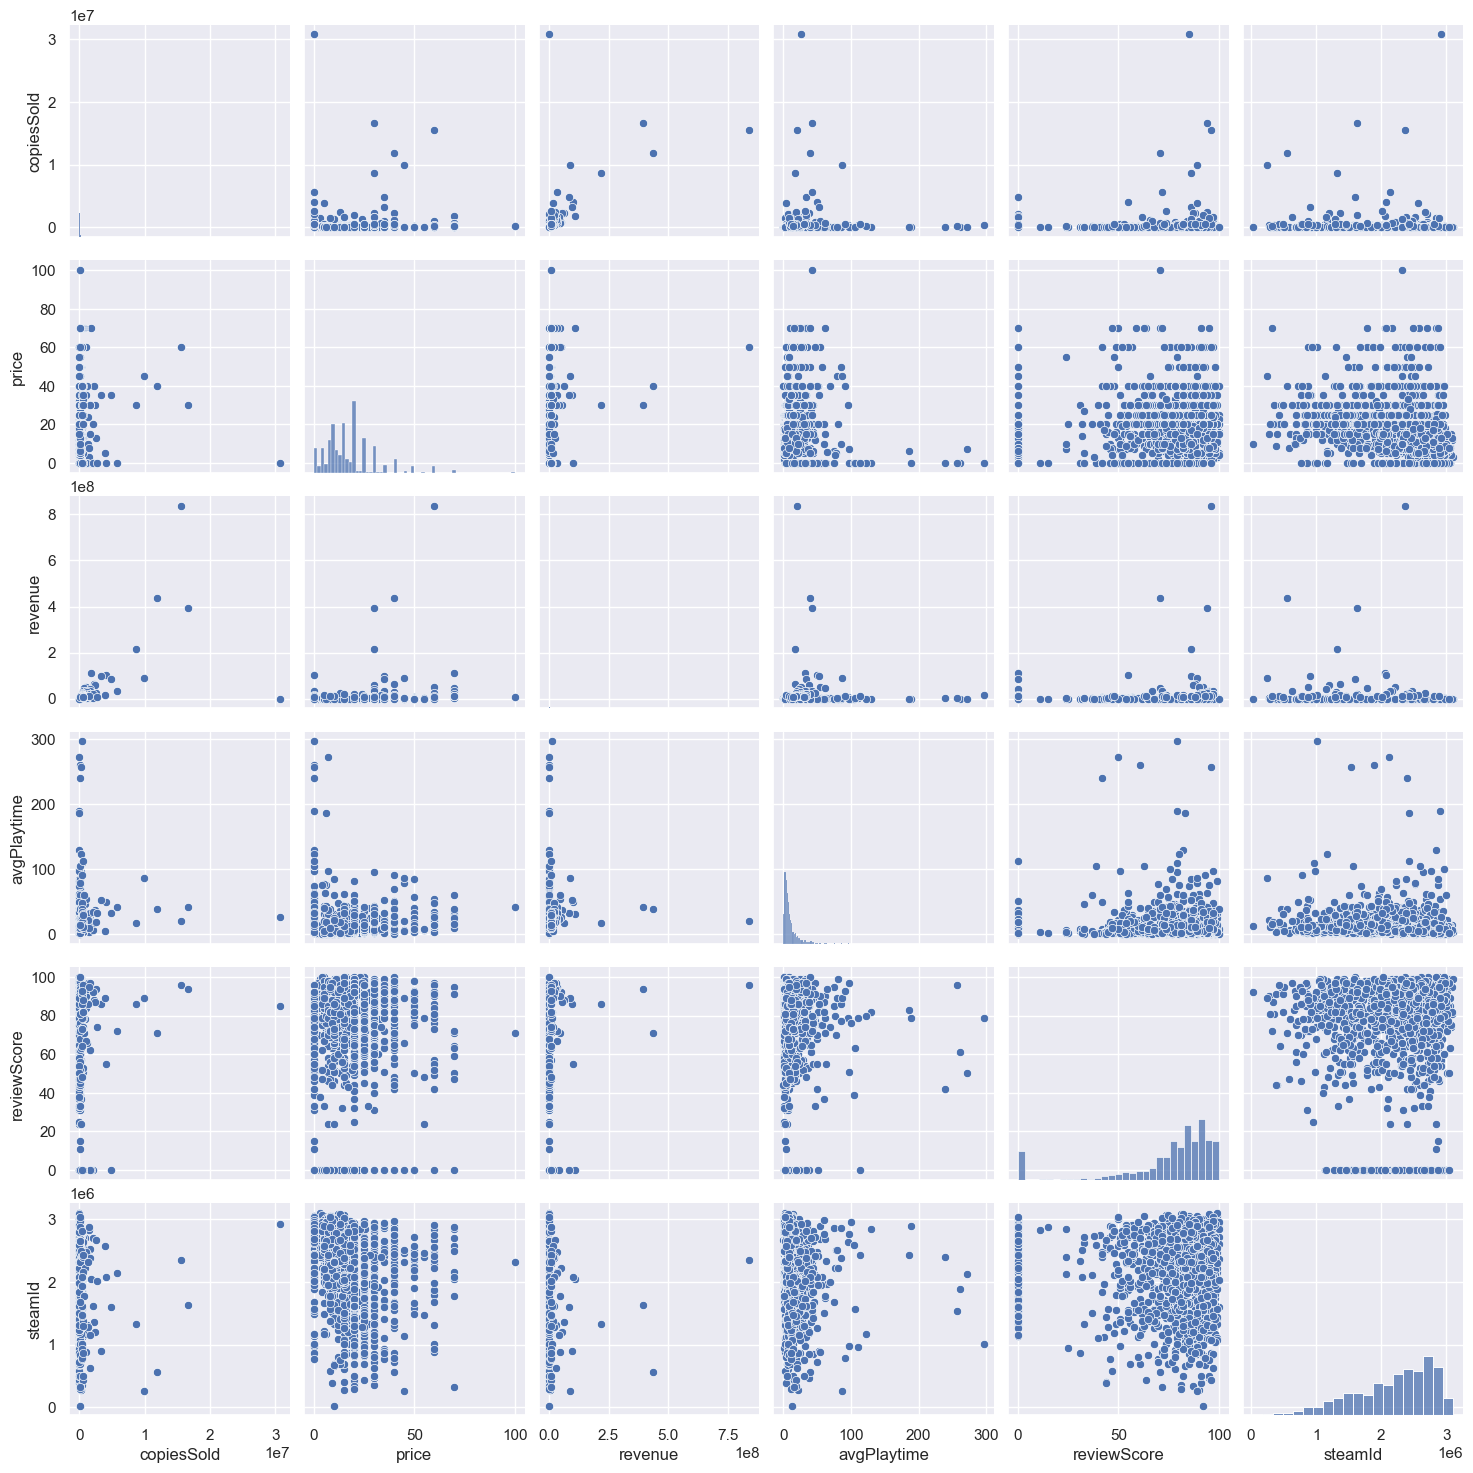

In [27]:
# Pairplot
sns.pairplot(dfsteam)

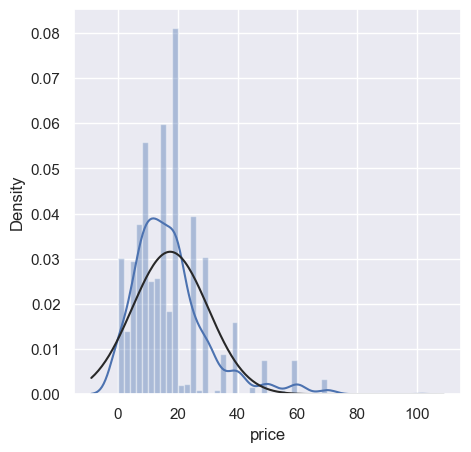

In [28]:
# Apresenta o histograma com uma curva suave e a normal
from scipy import stats
sns.distplot(dfsteam.price, fit = stats.norm);

## Preparação dos dados ou Pré-processamento dos dados

In [29]:
# Mostra o total de objetos resultantes
dfsteam.shape

(1497, 11)

In [30]:
# Mostra os 3 primeiros registros (objetos)
dfsteam.head(3)

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940


In [31]:
# Fazendo agrupamento por publisherClass
dfsteam.groupby('publisherClass').size()

publisherClass
AA        146
AAA        52
Indie    1299
dtype: int64

In [32]:
# Como há poucos objetos do tipo Hobbyist, vamos remover
dfsteam.drop(dfsteam[dfsteam.publisherClass == "Hobbyist"].index, inplace=True)

In [33]:
# Fazendo agrupamento por tipo de imóvel
dfsteam.groupby('publisherClass').size()

publisherClass
AA        146
AAA        52
Indie    1299
dtype: int64

In [34]:
# Mostra o total de objetos resultantes
dfsteam.shape

(1497, 11)

In [35]:
# Como steamID não será relevante na nossa analise vamos remove-lo
dfsteam = dfsteam.drop('steamId', axis=1)

In [36]:
# Mostra os 3 primeiros registros (objetos)
dfsteam.head(3)

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment"


### Limpeza de Dados - Dados Incompletos

In [37]:
# Mostra os 5 primeiros registros (objetos)
dfsteam.head()

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment"
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS


In [38]:
# Detecta o total de objetos ccontedo Nulos
dfsteam.isnull().sum()

name              0
releaseDate       0
copiesSold        0
price             0
revenue           0
avgPlaytime       0
reviewScore       0
publisherClass    0
publishers        0
developers        0
dtype: int64

In [39]:
# Remove os objetos com valores nulos
dfsteam.dropna(inplace=True)

In [40]:
# Atualiza os índices após a remoção, sem incluir os índices antigos
dfsteam.reset_index(drop=True)

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment"
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS
...,...,...,...,...,...,...,...,...,...,...
1492,Infection Free Zone,11-04-2024,452146,24.99,8739530.0,14.494432,73,Indie,Games Operators,Jutsu Games
1493,Dark and Darker,07-06-2024,2640903,0.00,8706135.0,31.974027,74,Indie,IRONMACE,IRONMACE
1494,Songs of Conquest,20-05-2024,501474,34.99,8641459.0,11.891152,88,AA,Coffee Stain Publishing,Lavapotion
1495,GUNDAM BREAKER 4,28-08-2024,156339,59.99,8440898.0,14.733899,81,AA,Bandai Namco Entertainment Inc.,"CRAFTS ＆ MEISTER Co., Ltd"


### Limpeza de Dados - Dados Inconsistentes

In [41]:
# Mostra o formato do dataset
dfsteam.shape

(1497, 10)

In [42]:
dfsteam.dtypes

name               object
releaseDate        object
copiesSold          int64
price             float64
revenue           float64
avgPlaytime       float64
reviewScore         int64
publisherClass     object
publishers         object
developers         object
dtype: object

In [43]:
dfsteam.groupby('publishers').size()

publishers
0 Deer Soft Partnership                  1
072 Project                             14
101XP                                    1
11 bit studios                           3
14 Hours Productions,Astrolabe Games     1
                                        ..
老乌贼工作室                                   1
致意                                       1
蒸汽满满工作室                                  1
零创游戏(ZerocreationGame),2P Games          1
雷鸣工作室                                    1
Length: 1131, dtype: int64

In [44]:
# Identifica o total de publishers diferentes
dfsteam.publishers.nunique()

1131

In [45]:
# Mostra os 5 primeiros registros (objetos)
dfsteam.head(5)

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment"
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS


In [46]:
# Mostra o formato do dataset
dfsteam.shape

(1497, 10)

In [47]:
# Alguns valores de avgPlaytime estão zero, então vamos remove-los
dfsteam[dfsteam['avgPlaytime'] == 0]

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers
1186,The Elder Scrolls Online: Gold Road,03-06-2024,27601,39.99,960791.0,0.0,44,AAA,Bethesda Softworks,ZeniMax Online Studios


In [48]:
# Obtém os registros onde avgPlaytime = 0
df_remove = dfsteam.loc[dfsteam['avgPlaytime'] == 0]

In [49]:
# Remove os objetos nos quais não há informação do avgPlaytime, ou seja, seu valor é = 0
dfsteam.drop(df_remove.index, inplace=True)

In [50]:
# Mostra o formato do dataset resultante
dfsteam.shape

(1496, 10)

### Limpeza de Dados - Dados Redundantes - Atributos

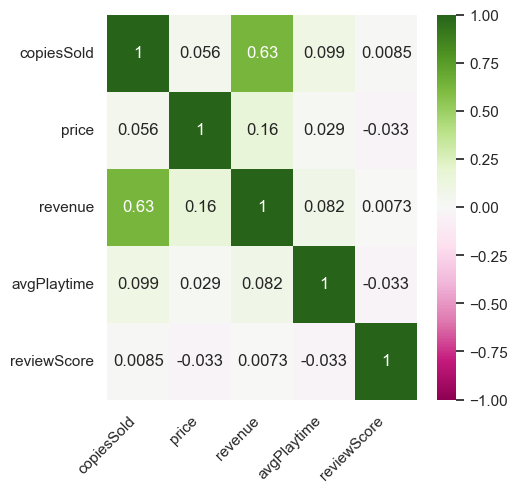

In [51]:
# Apresenta o mapa de calor em da correlação (Observe os atributos copiesSold + revenue, alta correlação positiva)
import seaborn as sns
dfsteam_numeric = dfsteam.select_dtypes(include=[float, int])
ax = sns.heatmap(dfsteam_numeric.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap = "PiYG")
sns.set(rc={'figure.figsize':(18,18)})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45, # rotaciona o eixo y 45o
    horizontalalignment='right' 
);

### Limpeza de Dados - Ruídos

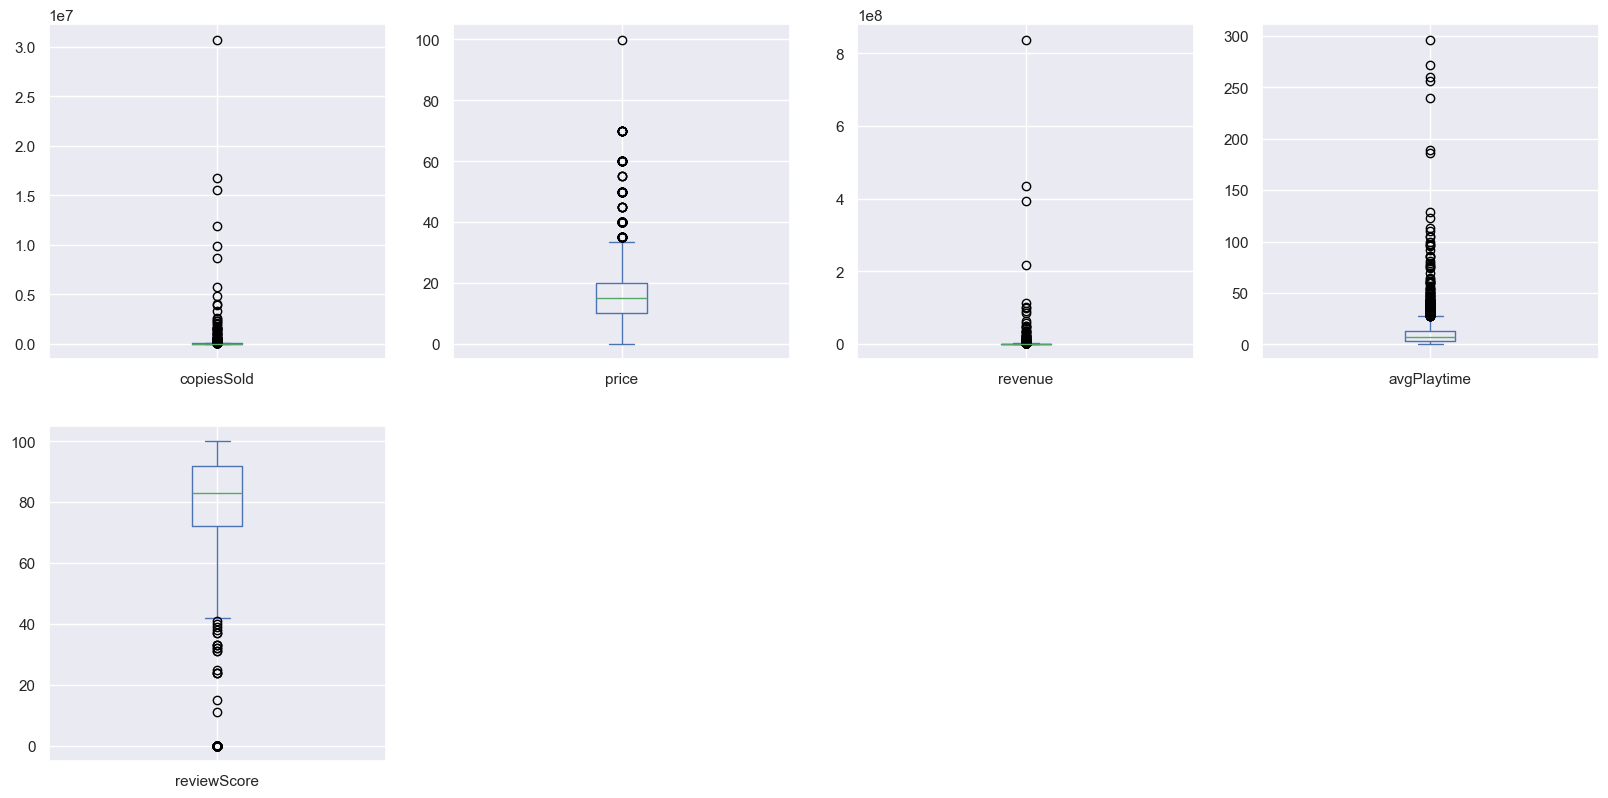

In [52]:
dfsteam.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize=(20,20))
plt.show()

In [53]:
# Ordenando os dados pela coluna price
dfsteam_salvo = dfsteam.sort_values(by=['price']); dfsteam_salvo

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers
1496,Dark and Darker,07-06-2024,2640903,0.00,8.706135e+06,31.974027,74,Indie,IRONMACE,IRONMACE
22,Pixel Gun 3D: PC Edition,02-04-2024,1626877,0.00,4.707782e+06,11.897823,62,Indie,Cubic Games Studio,Cubic Games Studio
1489,Lust Goddess,21-02-2024,456707,0.00,9.695496e+06,33.544343,48,Indie,BRAWEA LTD,BRAWEA LTD
26,Predecessor,20-08-2024,433605,0.00,4.523840e+06,109.913828,79,Indie,Omeda Studios,Omeda Studios
27,Palia,25-03-2024,881082,0.00,4.263470e+06,47.027915,78,Indie,Singularity 6 Corporation,Singularity 6 Corporation
...,...,...,...,...,...,...,...,...,...,...
48,EA SPORTS™ Madden NFL 25,15-08-2024,50521,69.99,3.182368e+06,16.106491,50,AAA,Electronic Arts,Tiburon
1463,TEKKEN 8,25-01-2024,734722,69.99,4.528511e+07,60.823722,71,AAA,Bandai Namco Entertainment,Bandai Namco Studios Inc.
1473,Like a Dragon: Infinite Wealth,25-01-2024,369330,69.99,2.126522e+07,38.898038,91,AA,SEGA,Ryu Ga Gotoku Studio
1454,Dragon's Dogma 2,21-03-2024,1785028,69.99,1.114783e+08,31.687050,0,AAA,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd."


In [54]:
# Reorganiza os índices
dfsteam_salvo.reset_index(drop=True, inplace=True); dfsteam_salvo.head(5)

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers
0,Dark and Darker,07-06-2024,2640903,0.0,8.706135e+06,31.974027,74,Indie,IRONMACE,IRONMACE
1,Pixel Gun 3D: PC Edition,02-04-2024,1626877,0.0,4.707782e+06,11.897823,62,Indie,Cubic Games Studio,Cubic Games Studio
2,Lust Goddess,21-02-2024,456707,0.0,9.695496e+06,33.544343,48,Indie,BRAWEA LTD,BRAWEA LTD
3,Predecessor,20-08-2024,433605,0.0,4.523840e+06,109.913828,79,Indie,Omeda Studios,Omeda Studios
4,Palia,25-03-2024,881082,0.0,4.263470e+06,47.027915,78,Indie,Singularity 6 Corporation,Singularity 6 Corporation


<Axes: >

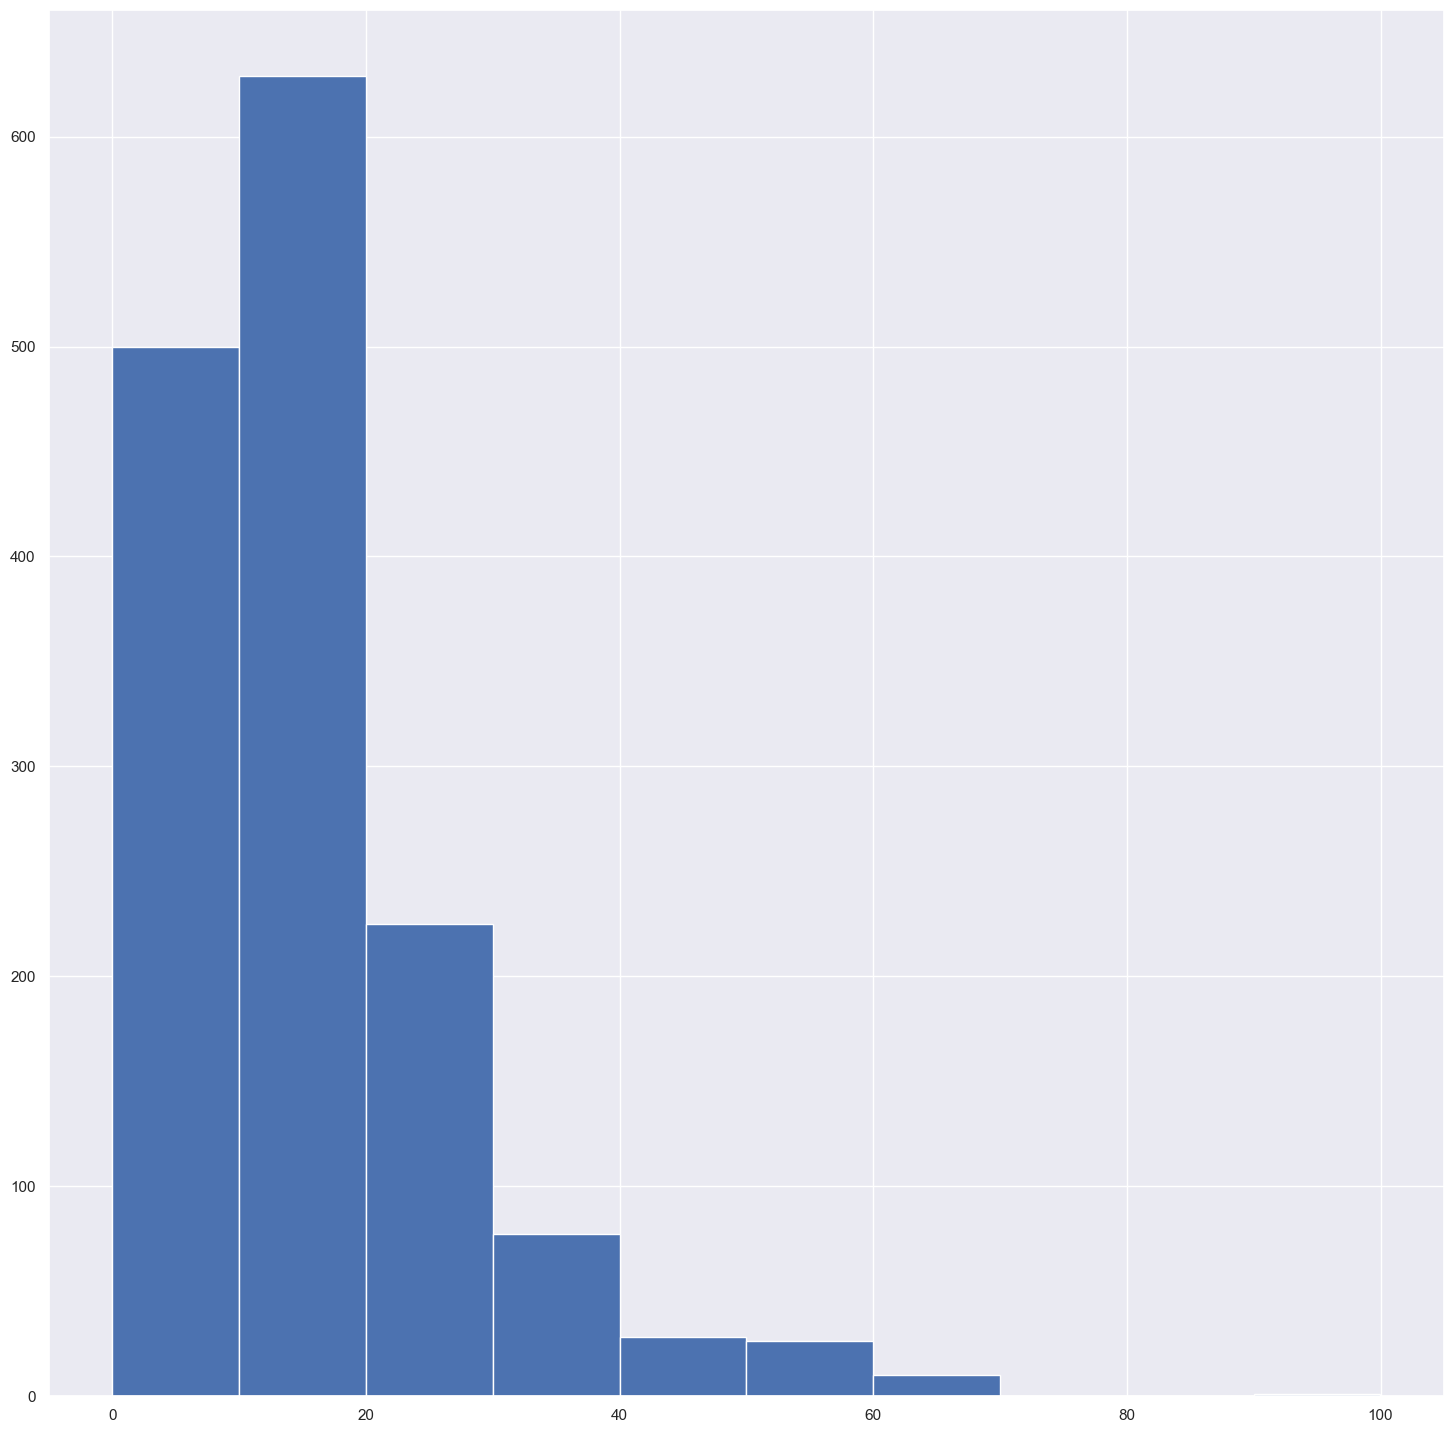

In [55]:
# Apresenta o histograma do atributo preço
# Pode-se observar a presença de valores outliers (extremos) com valores altos
dfsteam_salvo.price.hist()

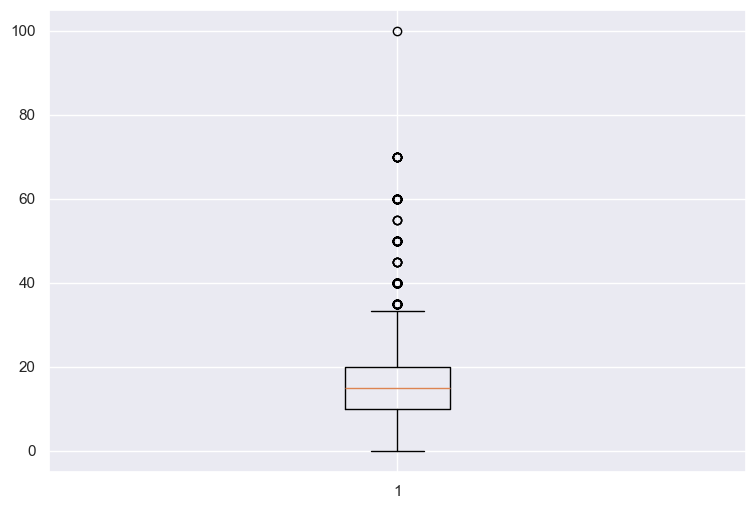

In [56]:
# Cria um Boxplot Simples
# Cria uma Figura de tamanho 9x6 cm
fig = plt.figure(1, figsize=(9, 6))

# Cria subplots
# Estes são os parâmetros da grade do subplot codificados como um único inteiro. 
# Por exemplo, "111" significa "grade 1x1, primeiro subplot".
ax = fig.add_subplot(111)

bp = ax.boxplot(dfsteam_salvo['price'])

In [57]:
# Filtra apenas colunas numéricas no DataFrame
dfsteam_salvo_numeric = dfsteam_salvo.select_dtypes(include=[float, int])
tamanho = len(dfsteam_salvo_numeric)
# Calcula o primeiro e o terceiro quartil apenas para colunas numéricas
primeiro_quartil = dfsteam_salvo_numeric.quantile(q=0.25, axis=0, interpolation='linear')
terceiro_quartil = dfsteam_salvo_numeric.quantile(q=0.75, axis=0, interpolation='linear')

In [58]:
# qtde de objetos do dataset
tamanho

1496

In [59]:
# Primeiro quartil do preço
primeiro_quartil

copiesSold      4918.750000
price              9.990000
revenue        45504.250000
avgPlaytime        3.583832
reviewScore       72.000000
Name: 0.25, dtype: float64

In [60]:
# valor do terceiro quartil
terceiro_quartil

copiesSold      38327.000000
price              19.990000
revenue        455156.750000
avgPlaytime        13.108488
reviewScore        92.000000
Name: 0.75, dtype: float64

In [61]:
# Calcula o FIQ
FIQ = terceiro_quartil.price - primeiro_quartil.price; FIQ

np.float64(9.999999999999998)

In [62]:
# Agora vem uma das partes mais importantes, vamos usar a regra 1,5xFIQ.
# Considerando o atributo prelo, faremos: Q1 - 1,5⋅FIQ e Q3 + 1,5⋅FIQ.
menor = primeiro_quartil.price - (int(FIQ) * 1.5)
maior = (int(FIQ) * 1.5) + terceiro_quartil.price

In [63]:
# outliers baixos estão abaixo do valor "menor".
menor

np.float64(-3.51)

In [64]:
# outliers altos estão acima do valor "maior".
maior

np.float64(33.489999999999995)

In [65]:
# Os objetos cujo resultado da comparação do atributo preço e "False" será um outlier
dfsteam_salvo.price > menor

0       True
1       True
2       True
3       True
4       True
        ... 
1491    True
1492    True
1493    True
1494    True
1495    True
Name: price, Length: 1496, dtype: bool

In [66]:
# Então, qualquer valor abaixo é um outlier e será removido do dataset. 
dfsteam_salvo = dfsteam_salvo[(dfsteam_salvo.price > menor)]; dfsteam_salvo

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers
0,Dark and Darker,07-06-2024,2640903,0.00,8.706135e+06,31.974027,74,Indie,IRONMACE,IRONMACE
1,Pixel Gun 3D: PC Edition,02-04-2024,1626877,0.00,4.707782e+06,11.897823,62,Indie,Cubic Games Studio,Cubic Games Studio
2,Lust Goddess,21-02-2024,456707,0.00,9.695496e+06,33.544343,48,Indie,BRAWEA LTD,BRAWEA LTD
3,Predecessor,20-08-2024,433605,0.00,4.523840e+06,109.913828,79,Indie,Omeda Studios,Omeda Studios
4,Palia,25-03-2024,881082,0.00,4.263470e+06,47.027915,78,Indie,Singularity 6 Corporation,Singularity 6 Corporation
...,...,...,...,...,...,...,...,...,...,...
1491,EA SPORTS™ Madden NFL 25,15-08-2024,50521,69.99,3.182368e+06,16.106491,50,AAA,Electronic Arts,Tiburon
1492,TEKKEN 8,25-01-2024,734722,69.99,4.528511e+07,60.823722,71,AAA,Bandai Namco Entertainment,Bandai Namco Studios Inc.
1493,Like a Dragon: Infinite Wealth,25-01-2024,369330,69.99,2.126522e+07,38.898038,91,AA,SEGA,Ryu Ga Gotoku Studio
1494,Dragon's Dogma 2,21-03-2024,1785028,69.99,1.114783e+08,31.687050,0,AAA,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd."


In [67]:
# Os objetos cujo resultado da comparação do atributo preço e "False" será um outlier
dfsteam_salvo.price < maior

0        True
1        True
2        True
3        True
4        True
        ...  
1491    False
1492    False
1493    False
1494    False
1495    False
Name: price, Length: 1496, dtype: bool

In [68]:
# Então, qualquer valor acima é um outlier e será removido.
dfsteam_salvo = dfsteam_salvo[(dfsteam_salvo.price < maior)]; dfsteam_salvo

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers
0,Dark and Darker,07-06-2024,2640903,0.00,8.706135e+06,31.974027,74,Indie,IRONMACE,IRONMACE
1,Pixel Gun 3D: PC Edition,02-04-2024,1626877,0.00,4.707782e+06,11.897823,62,Indie,Cubic Games Studio,Cubic Games Studio
2,Lust Goddess,21-02-2024,456707,0.00,9.695496e+06,33.544343,48,Indie,BRAWEA LTD,BRAWEA LTD
3,Predecessor,20-08-2024,433605,0.00,4.523840e+06,109.913828,79,Indie,Omeda Studios,Omeda Studios
4,Palia,25-03-2024,881082,0.00,4.263470e+06,47.027915,78,Indie,Singularity 6 Corporation,Singularity 6 Corporation
...,...,...,...,...,...,...,...,...,...,...
1352,Another Crab's Treasure,25-04-2024,264723,29.99,5.719324e+06,10.434608,95,Indie,Aggro Crab,Aggro Crab
1353,Cricket Captain 2024,06-06-2024,1932,29.99,5.214600e+04,34.641943,71,Indie,Childish Things Ltd,Childish Things Ltd
1354,Nancy Drew®: Mystery of the Seven Keys™,20-06-2024,7242,32.00,2.085690e+05,7.070747,60,Indie,HeR Interactive,HeR Interactive
1355,Le Mans Ultimate,20-02-2024,120703,32.99,3.740762e+06,24.519898,78,Indie,Studio 397,Studio 397


In [69]:
# mostra o shape (total de registros por colunas)
dfsteam_salvo.shape

(1357, 10)

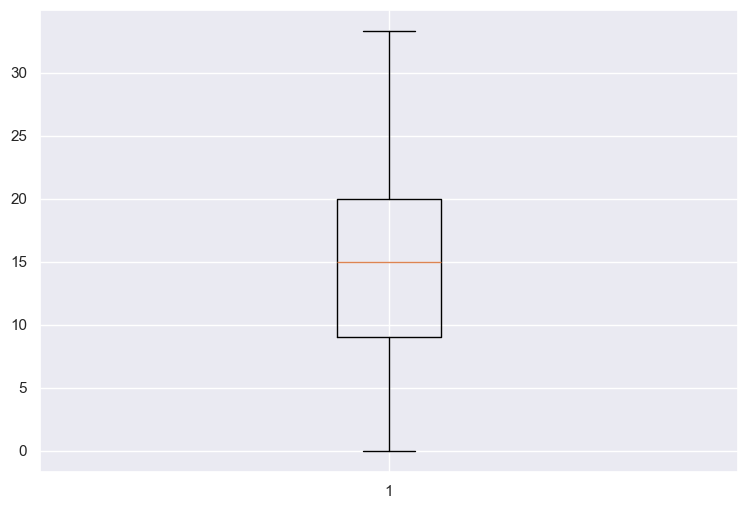

In [70]:
# Cria um Boxplot Simples
# Cria uma Figura de tamanho 9x6 cm
fig = plt.figure(1, figsize=(9, 6))

# Cria subplots
# Estes são os parâmetros da grade do subplot codificados como um único inteiro. 
# Por exemplo, "111" significa "grade 1x1, primeiro subplot".
ax = fig.add_subplot(111)

bp = ax.boxplot(dfsteam_salvo['price'])

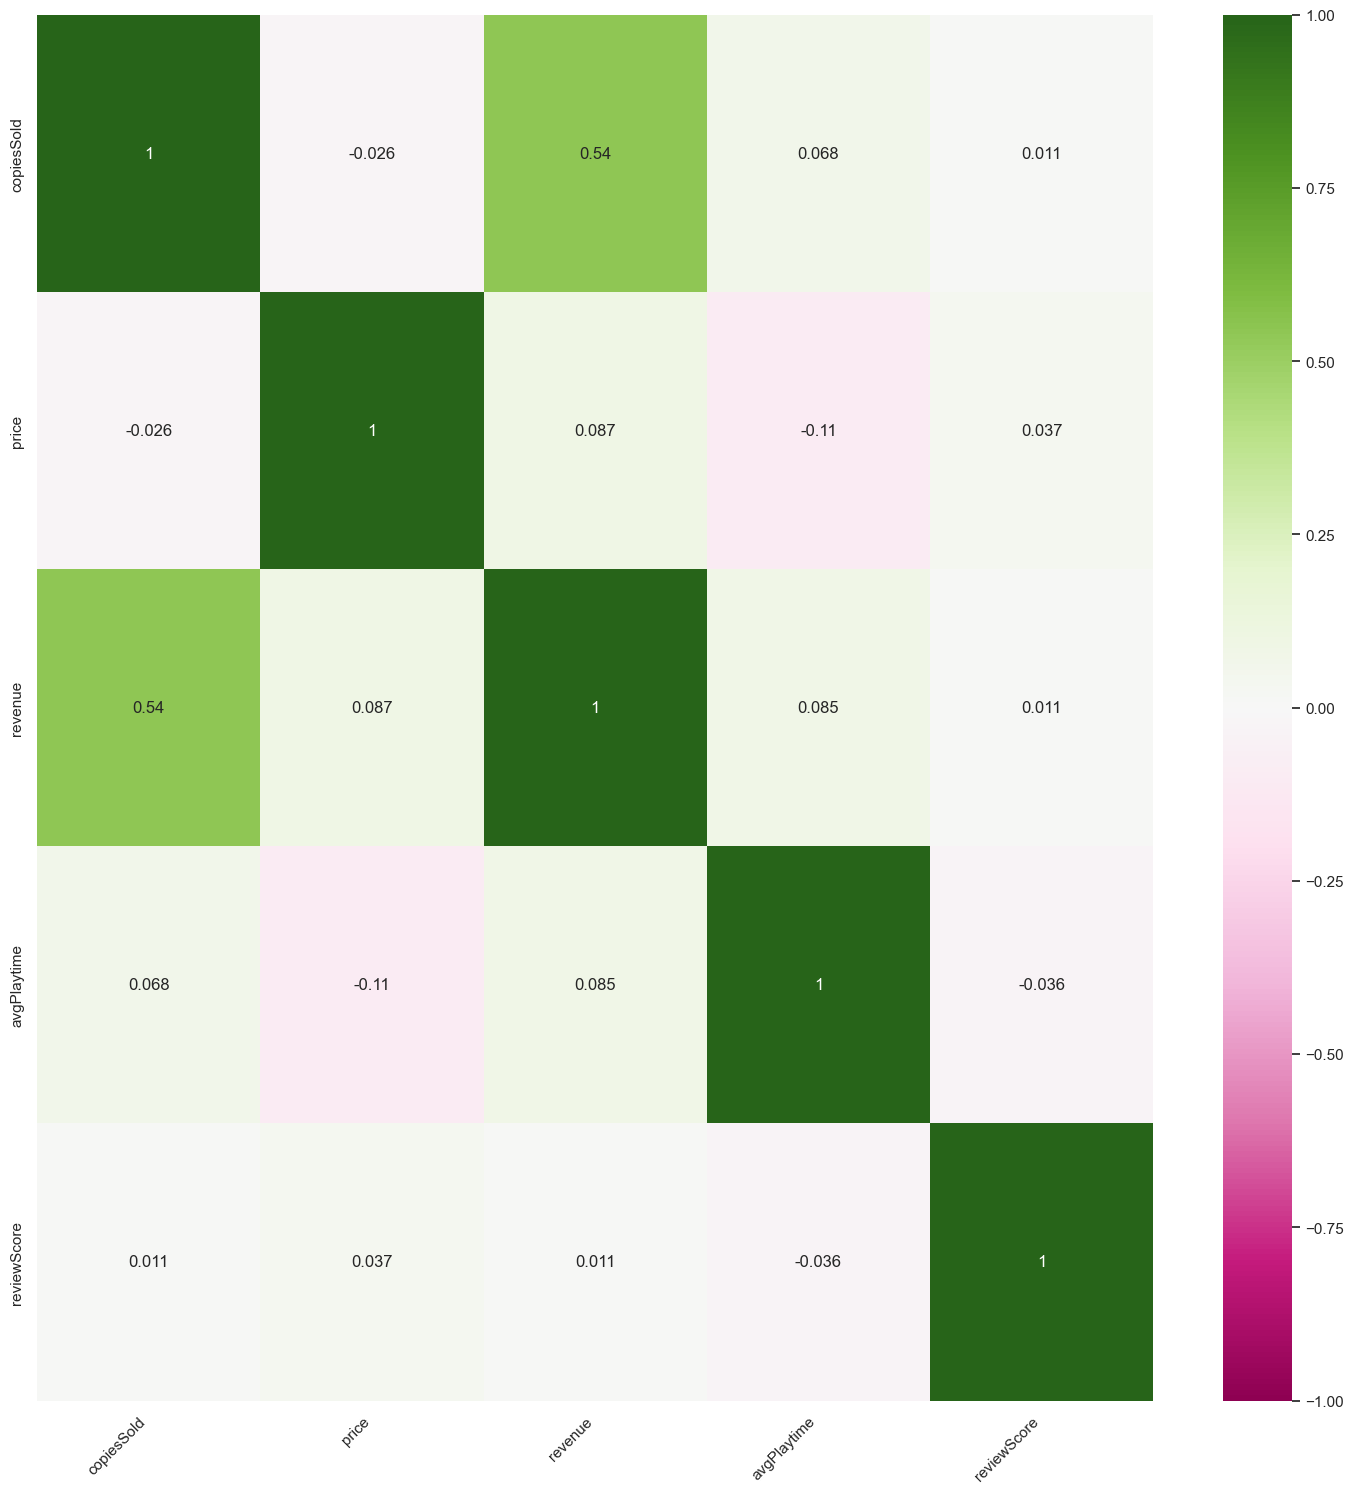

In [71]:
# apresenta o mapa de calor resultante
dfsteam_salvo_numeric = dfsteam_salvo.select_dtypes(include=[float, int])
ax = sns.heatmap(dfsteam_salvo_numeric.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap = "PiYG")
sns.set(rc={'figure.figsize':(18,18)})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45, # rotaciona o eixo y 45o
    horizontalalignment='right' 
);

In [72]:
# Grava os dados
dfsteam_salvo.to_csv("Steam_2024_bestRevenue_1500_depoislimpeza.csv", index=False)

## Normalização - "Min-Max Scaler"

In [73]:
# Import dos módulos
from sklearn.preprocessing import MinMaxScaler

In [74]:
# Carregando arquivo csv usando Pandas (método que usaremos neste notebook)
# Leitura do arquivo CSV com separador "," e codificação UTF-8
dfsteam_limpa = pd.read_csv('Steam_2024_bestRevenue_1500_depoislimpeza.csv', sep = ',', encoding = 'UTF-8')

In [75]:
# Apresenta os dados
dfsteam_limpa.head(3)

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers
0,Dark and Darker,07-06-2024,2640903,0.0,8706135.0,31.974027,74,Indie,IRONMACE,IRONMACE
1,Pixel Gun 3D: PC Edition,02-04-2024,1626877,0.0,4707782.0,11.897823,62,Indie,Cubic Games Studio,Cubic Games Studio
2,Lust Goddess,21-02-2024,456707,0.0,9695496.0,33.544343,48,Indie,BRAWEA LTD,BRAWEA LTD


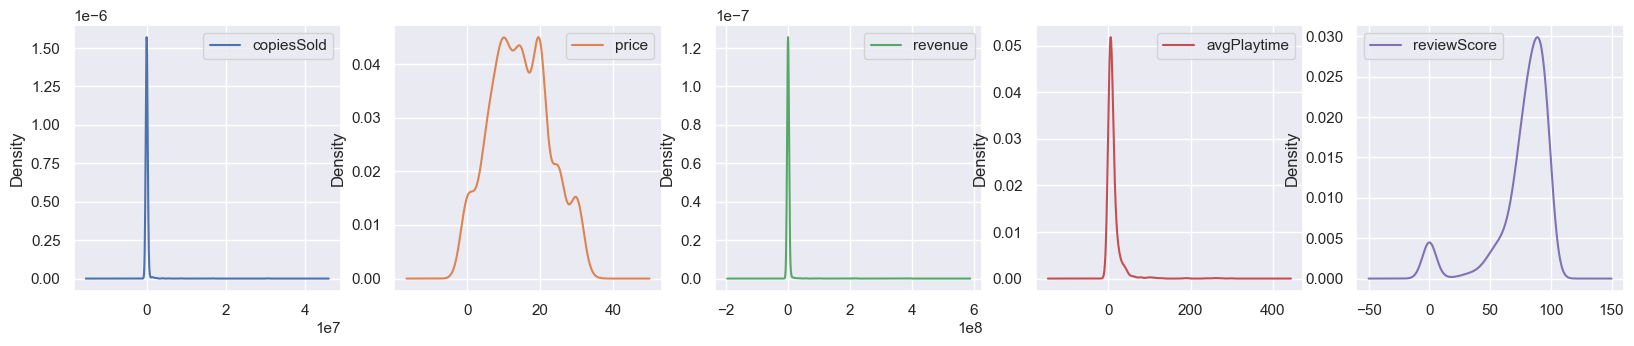

In [76]:
# Density Plot Univariado
dfsteam_limpa.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, figsize=(20,20))
plt.show()

In [77]:
# Obtém os valores X a normalizar
array = dfsteam_limpa.values; X = array[:,2:5] # todos os registros colunas 2 a 5 (exclusivo)

In [78]:
# Transformando os dados para a mesma escala (entre 0 e 1)
# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1)) # obtém o objeto que realiza a escala 
rescaledX = scaler.fit_transform(X)  # aplica a escala

In [79]:
# Identifica o tipo do objeto retornado em rescaledX
type(rescaledX)

numpy.ndarray

In [80]:
# Sumarizando os dados transformados
print("Dados Originais: \n\n", X)
print("\nDados Normalizados: \n\n", rescaledX)

Dados Originais: 

 [[2640903 0.0 8706135.0]
 [1626877 0.0 4707782.0]
 [456707 0.0 9695496.0]
 ...
 [7242 32.0 208569.0]
 [120703 32.99 3740762.0]
 [632326 33.32 17732078.0]]

Dados Normalizados: 

 [[8.58922304e-02 0.00000000e+00 2.21393999e-02]
 [5.29033713e-02 0.00000000e+00 1.19475245e-02]
 [1.48347486e-02 0.00000000e+00 2.46612992e-02]
 ...
 [2.12502665e-04 9.60384154e-01 4.78947811e-04]
 [3.90367917e-03 9.90096038e-01 9.48257274e-03]
 [2.05480838e-02 1.00000000e+00 4.51466946e-02]]


In [81]:
# Apresenta o shape do array
array[:,0:2].shape

(1357, 2)

In [82]:
# Apresenta o shape do rescaledX
rescaledX.shape

(1357, 3)

In [83]:
# Apresenta o shape do array a partir da 5a posição
array[:,5:].shape

(1357, 5)

In [84]:
# Retornando os valores para o array concatenando todos em um único arrayAtual
arrayAtual = np.column_stack((array[:,0:2], rescaledX))
arrayAtual = np.column_stack((arrayAtual, array[:,5:]))

In [85]:
# Array concatenado e seu formato
arrayAtual.shape

(1357, 10)

In [86]:
# Cria um dataframe a partir do array finalizado
dataframeCriado = pd.DataFrame(arrayAtual)

In [87]:
# Mostra os 5 primeiros registros
dataframeCriado.head()

,0,1,2,3,4,5,6,7,8,9
0,Dark and Darker,07-06-2024,0.085892,0.0,0.022139,31.974027,74,Indie,IRONMACE,IRONMACE
1,Pixel Gun 3D: PC Edition,02-04-2024,0.052903,0.0,0.011948,11.897823,62,Indie,Cubic Games Studio,Cubic Games Studio
2,Lust Goddess,21-02-2024,0.014835,0.0,0.024661,33.544343,48,Indie,BRAWEA LTD,BRAWEA LTD
3,Predecessor,20-08-2024,0.014083,0.0,0.011479,109.913828,79,Indie,Omeda Studios,Omeda Studios
4,Palia,25-03-2024,0.028641,0.0,0.010815,47.027915,78,Indie,Singularity 6 Corporation,Singularity 6 Corporation


In [88]:
# Modifica os nomes das colunas para o nome original
dataframeCriado.columns = dfsteam_limpa.columns

In [89]:
# Reinserindo os dados normalizados para o dataframe original
dfsteam_limpa = dataframeCriado

In [90]:
# mostrando os dados do dataframe normalizados
dfsteam_limpa.head()

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers
0,Dark and Darker,07-06-2024,0.085892,0.0,0.022139,31.974027,74,Indie,IRONMACE,IRONMACE
1,Pixel Gun 3D: PC Edition,02-04-2024,0.052903,0.0,0.011948,11.897823,62,Indie,Cubic Games Studio,Cubic Games Studio
2,Lust Goddess,21-02-2024,0.014835,0.0,0.024661,33.544343,48,Indie,BRAWEA LTD,BRAWEA LTD
3,Predecessor,20-08-2024,0.014083,0.0,0.011479,109.913828,79,Indie,Omeda Studios,Omeda Studios
4,Palia,25-03-2024,0.028641,0.0,0.010815,47.027915,78,Indie,Singularity 6 Corporation,Singularity 6 Corporation


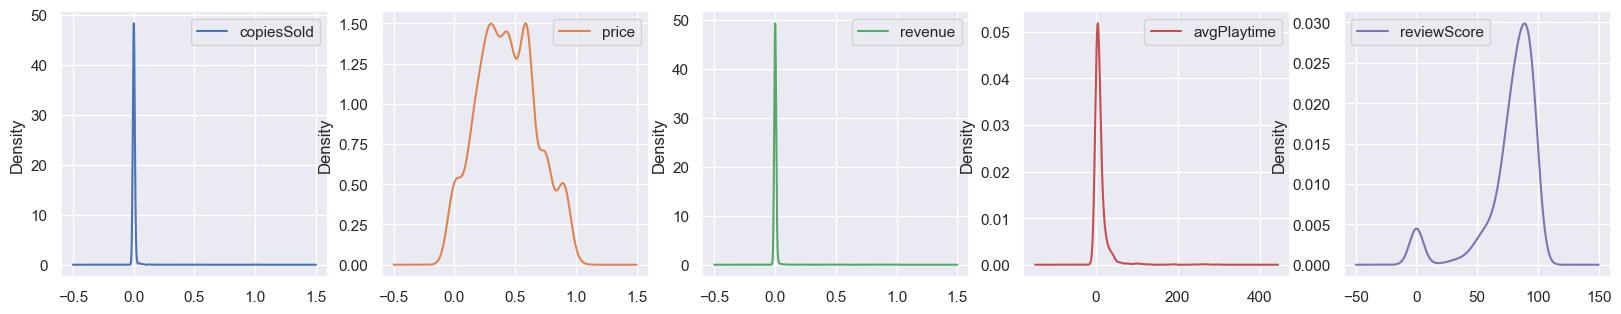

In [91]:
# Density Plot Univariado
dfsteam_limpa.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, figsize=(20,20))
plt.show()

In [92]:
# Grava os valores
dfsteam_limpa.to_csv("Steam_2024_bestRevenue_1500_minmax.csv", index=False)

## Normalização: Padronização (escore-z)

In [93]:
# Import dos módulos associados ao escore-z
from sklearn.preprocessing import StandardScaler

In [94]:
# Carregando arquivo csv usando Pandas (método que usaremos neste notebook)
# Leitura do arquivo CSV com separador "," e codificação UTF-8
dfsteam_normal = pd.read_csv('Steam_2024_bestRevenue_1500_minmax.csv', sep = ',', encoding = 'UTF-8')

In [95]:
dfsteam_normal.head(3)

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers
0,Dark and Darker,07-06-2024,0.085892,0.0,0.022139,31.974027,74,Indie,IRONMACE,IRONMACE
1,Pixel Gun 3D: PC Edition,02-04-2024,0.052903,0.0,0.011948,11.897823,62,Indie,Cubic Games Studio,Cubic Games Studio
2,Lust Goddess,21-02-2024,0.014835,0.0,0.024661,33.544343,48,Indie,BRAWEA LTD,BRAWEA LTD


Média: 76.77818717759764, Desvio Padrão: 23.991152412011893


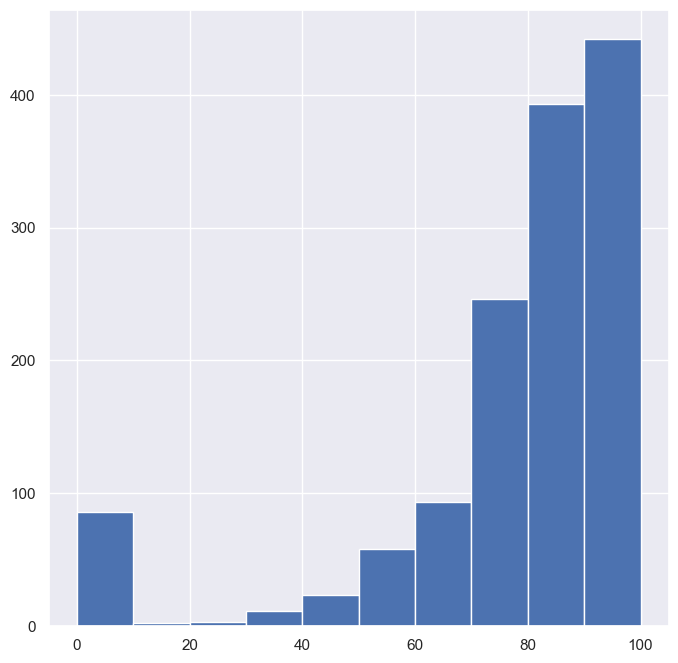

In [96]:
# Apresenta o histograma com a média e o desvio padrão do atributo reviewScore
dfsteam_normal.reviewScore.hist(figsize=(8,8))
print("Média: {}, Desvio Padrão: {}".format(dfsteam_normal.reviewScore.mean(), dfsteam_normal.reviewScore.std()))

In [97]:
# Apresenta o dataframe normalizado e padronizado
dfsteam_normal.head()

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers
0,Dark and Darker,07-06-2024,0.085892,0.0,0.022139,31.974027,74,Indie,IRONMACE,IRONMACE
1,Pixel Gun 3D: PC Edition,02-04-2024,0.052903,0.0,0.011948,11.897823,62,Indie,Cubic Games Studio,Cubic Games Studio
2,Lust Goddess,21-02-2024,0.014835,0.0,0.024661,33.544343,48,Indie,BRAWEA LTD,BRAWEA LTD
3,Predecessor,20-08-2024,0.014083,0.0,0.011479,109.913828,79,Indie,Omeda Studios,Omeda Studios
4,Palia,25-03-2024,0.028641,0.0,0.010815,47.027915,78,Indie,Singularity 6 Corporation,Singularity 6 Corporation


In [98]:
# Média depois da padronização
dfsteam_normal.reviewScore.mean()

np.float64(76.77818717759764)

In [99]:
# Desvio padrão depois da padronização
dfsteam_normal.reviewScore.std()

np.float64(23.991152412011893)

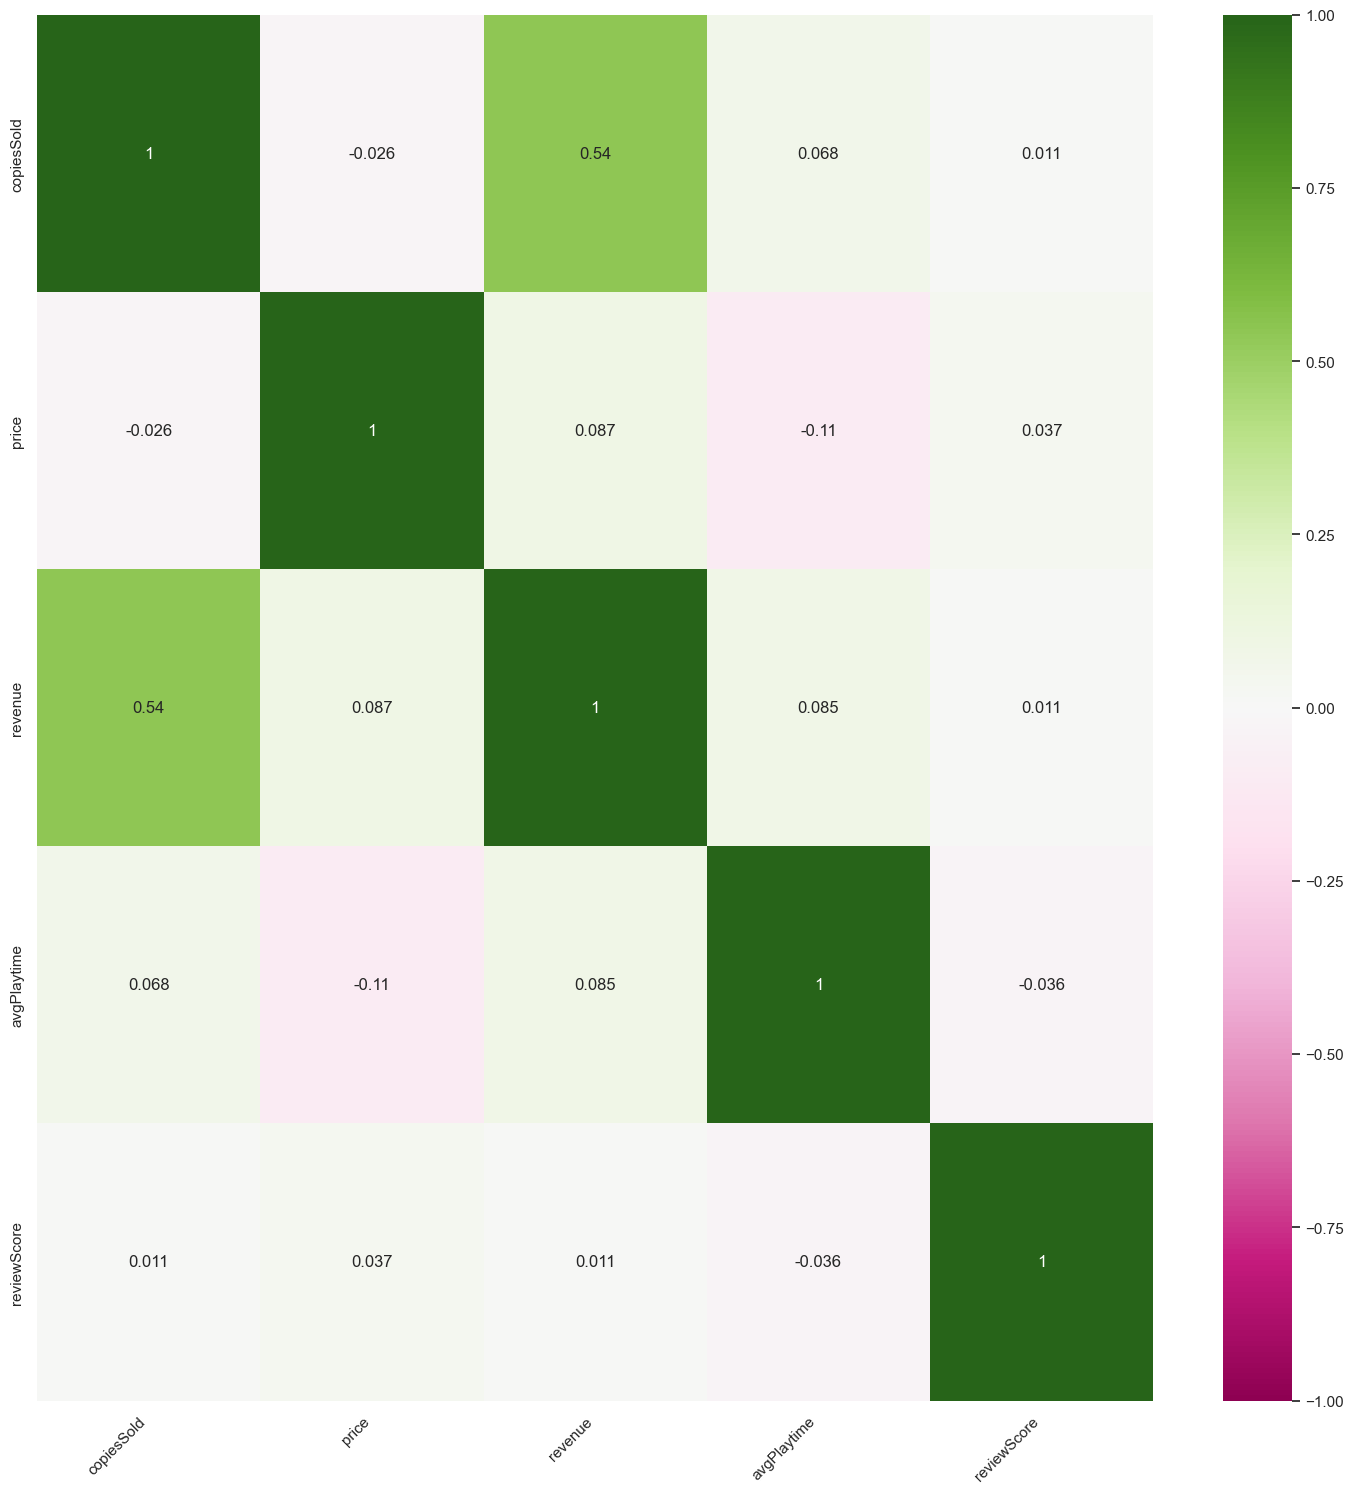

In [100]:
# apresenta o mapa de calor resultante 
dfsteam_numeric = dfsteam_normal.select_dtypes(include=[float, int])
ax = sns.heatmap(dfsteam_numeric.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap = "PiYG")
sns.set(rc={'figure.figsize':(18,18)})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45, # rotaciona o eixo y 45o
    horizontalalignment='right' 
);

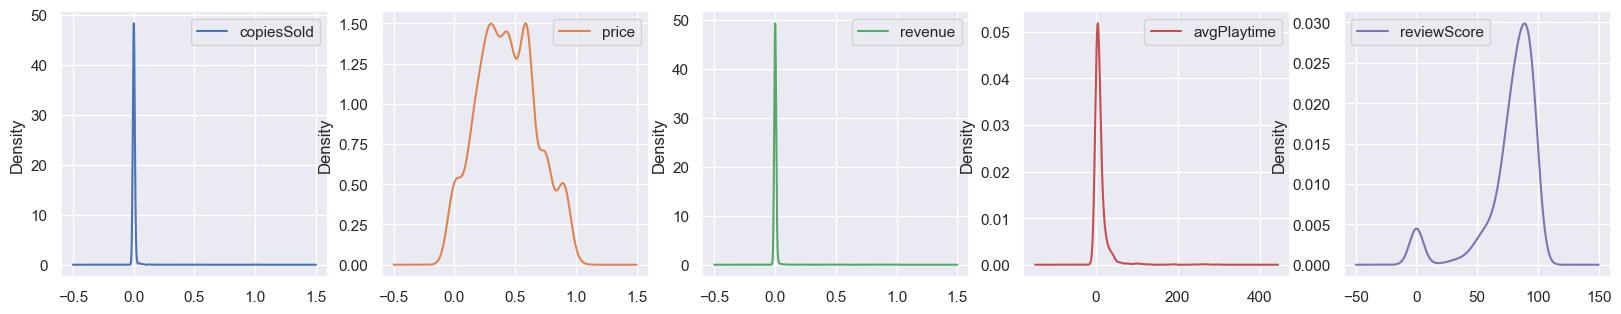

In [101]:
# Density Plot Univariado
dfsteam_normal.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, figsize=(20,20))
plt.show()

Observe que todos os atributos preditores estão com valores entre -1 e 1.

In [102]:
# Grava os dados
dfsteam_normal.to_csv("Steam_2024_bestRevenue_1500_escorez.csv", index=False)

## One-Hot Encoding: Variáveis categóricas em numéricas

In [103]:
# Carregando arquivo csv usando Pandas (método que usaremos neste notebook)
# Leitura do arquivo CSV com separador "," e codificação UTF-8
dfsteam_normal = pd.read_csv('Steam_2024_bestRevenue_1500_escorez.csv', sep = ',', encoding = 'UTF-8')

In [104]:
# mostra o shape (total de registros por colunas)
dfsteam_normal.shape

(1357, 10)

In [105]:
# Apresenta os quatro primeiros registros
dfsteam_normal.head(4)

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers
0,Dark and Darker,07-06-2024,0.085892,0.0,0.022139,31.974027,74,Indie,IRONMACE,IRONMACE
1,Pixel Gun 3D: PC Edition,02-04-2024,0.052903,0.0,0.011948,11.897823,62,Indie,Cubic Games Studio,Cubic Games Studio
2,Lust Goddess,21-02-2024,0.014835,0.0,0.024661,33.544343,48,Indie,BRAWEA LTD,BRAWEA LTD
3,Predecessor,20-08-2024,0.014083,0.0,0.011479,109.913828,79,Indie,Omeda Studios,Omeda Studios


In [106]:
# Realiza o agrupamento por publishers
dfsteam_normal.groupby('publisherClass').size()

publisherClass
AA         93
AAA        27
Indie    1237
dtype: int64

In [107]:
# Identifica o total de publisherss
dfsteam_normal.publisherClass.nunique()

3

In [108]:
# converte as variáveis categóricas (mais de dois valores por atributo) para dummies (numéricas)
# Ou seja, aplica o One-Hot Encoding
dfsteam_dummies = pd.get_dummies(dfsteam_normal, columns=['publisherClass'])
dfsteam_dummies

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publishers,developers,publisherClass_AA,publisherClass_AAA,publisherClass_Indie
0,Dark and Darker,07-06-2024,0.085892,0.000000,0.022139,31.974027,74,IRONMACE,IRONMACE,False,False,True
1,Pixel Gun 3D: PC Edition,02-04-2024,0.052903,0.000000,0.011948,11.897823,62,Cubic Games Studio,Cubic Games Studio,False,False,True
2,Lust Goddess,21-02-2024,0.014835,0.000000,0.024661,33.544343,48,BRAWEA LTD,BRAWEA LTD,False,False,True
3,Predecessor,20-08-2024,0.014083,0.000000,0.011479,109.913828,79,Omeda Studios,Omeda Studios,False,False,True
4,Palia,25-03-2024,0.028641,0.000000,0.010815,47.027915,78,Singularity 6 Corporation,Singularity 6 Corporation,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1352,Another Crab's Treasure,25-04-2024,0.008589,0.900060,0.014526,10.434608,95,Aggro Crab,Aggro Crab,False,False,True
1353,Cricket Captain 2024,06-06-2024,0.000040,0.900060,0.000080,34.641943,71,Childish Things Ltd,Childish Things Ltd,False,False,True
1354,Nancy Drew®: Mystery of the Seven Keys™,20-06-2024,0.000213,0.960384,0.000479,7.070747,60,HeR Interactive,HeR Interactive,False,False,True
1355,Le Mans Ultimate,20-02-2024,0.003904,0.990096,0.009483,24.519898,78,Studio 397,Studio 397,False,False,True


In [109]:
# Reorganiza os índices
dfsteam_dummies.reset_index(inplace=True); dfsteam_dummies

,index,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publishers,developers,publisherClass_AA,publisherClass_AAA,publisherClass_Indie
0,0,Dark and Darker,07-06-2024,0.085892,0.000000,0.022139,31.974027,74,IRONMACE,IRONMACE,False,False,True
1,1,Pixel Gun 3D: PC Edition,02-04-2024,0.052903,0.000000,0.011948,11.897823,62,Cubic Games Studio,Cubic Games Studio,False,False,True
2,2,Lust Goddess,21-02-2024,0.014835,0.000000,0.024661,33.544343,48,BRAWEA LTD,BRAWEA LTD,False,False,True
3,3,Predecessor,20-08-2024,0.014083,0.000000,0.011479,109.913828,79,Omeda Studios,Omeda Studios,False,False,True
4,4,Palia,25-03-2024,0.028641,0.000000,0.010815,47.027915,78,Singularity 6 Corporation,Singularity 6 Corporation,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,1352,Another Crab's Treasure,25-04-2024,0.008589,0.900060,0.014526,10.434608,95,Aggro Crab,Aggro Crab,False,False,True
1353,1353,Cricket Captain 2024,06-06-2024,0.000040,0.900060,0.000080,34.641943,71,Childish Things Ltd,Childish Things Ltd,False,False,True
1354,1354,Nancy Drew®: Mystery of the Seven Keys™,20-06-2024,0.000213,0.960384,0.000479,7.070747,60,HeR Interactive,HeR Interactive,False,False,True
1355,1355,Le Mans Ultimate,20-02-2024,0.003904,0.990096,0.009483,24.519898,78,Studio 397,Studio 397,False,False,True


In [110]:
dfsteam_dummies.drop(columns=['index'], inplace=True); dfsteam_dummies

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publishers,developers,publisherClass_AA,publisherClass_AAA,publisherClass_Indie
0,Dark and Darker,07-06-2024,0.085892,0.000000,0.022139,31.974027,74,IRONMACE,IRONMACE,False,False,True
1,Pixel Gun 3D: PC Edition,02-04-2024,0.052903,0.000000,0.011948,11.897823,62,Cubic Games Studio,Cubic Games Studio,False,False,True
2,Lust Goddess,21-02-2024,0.014835,0.000000,0.024661,33.544343,48,BRAWEA LTD,BRAWEA LTD,False,False,True
3,Predecessor,20-08-2024,0.014083,0.000000,0.011479,109.913828,79,Omeda Studios,Omeda Studios,False,False,True
4,Palia,25-03-2024,0.028641,0.000000,0.010815,47.027915,78,Singularity 6 Corporation,Singularity 6 Corporation,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1352,Another Crab's Treasure,25-04-2024,0.008589,0.900060,0.014526,10.434608,95,Aggro Crab,Aggro Crab,False,False,True
1353,Cricket Captain 2024,06-06-2024,0.000040,0.900060,0.000080,34.641943,71,Childish Things Ltd,Childish Things Ltd,False,False,True
1354,Nancy Drew®: Mystery of the Seven Keys™,20-06-2024,0.000213,0.960384,0.000479,7.070747,60,HeR Interactive,HeR Interactive,False,False,True
1355,Le Mans Ultimate,20-02-2024,0.003904,0.990096,0.009483,24.519898,78,Studio 397,Studio 397,False,False,True


In [111]:
# Grava os dados
dfsteam_dummies.to_csv("Steam_2024_bestRevenue_1500_oneHot.csv", index=False)

# Ordenando o Dataset

In [112]:
# Carregando arquivo csv usando Pandas (método que usaremos neste notebook) com a Preparação dos dados realizada
# Leitura do arquivo CSV com separador "," e codificação UTF-8
dfsteam_preparados = pd.read_csv('Steam_2024_bestRevenue_1500_oneHot.csv', sep = ',', encoding = 'UTF-8')

In [113]:
# apresenta os dados
dfsteam_preparados.head(3)

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publishers,developers,publisherClass_AA,publisherClass_AAA,publisherClass_Indie
0,Dark and Darker,07-06-2024,0.085892,0.0,0.022139,31.974027,74,IRONMACE,IRONMACE,False,False,True
1,Pixel Gun 3D: PC Edition,02-04-2024,0.052903,0.0,0.011948,11.897823,62,Cubic Games Studio,Cubic Games Studio,False,False,True
2,Lust Goddess,21-02-2024,0.014835,0.0,0.024661,33.544343,48,BRAWEA LTD,BRAWEA LTD,False,False,True


In [114]:
# troca branco por espaço nas colunas spaces with '_'  
dfsteam_preparados.columns = [column.replace(" ", "_") for column in dfsteam_preparados.columns] 

In [115]:
# Obtendo o conjunto de nomes dos atributos e colocando em uma lista
cols =dfsteam_preparados.columns.tolist(); cols

['name',
 'releaseDate',
 'copiesSold',
 'price',
 'revenue',
 'avgPlaytime',
 'reviewScore',
 'publishers',
 'developers',
 'publisherClass_AA',
 'publisherClass_AAA',
 'publisherClass_Indie']

In [116]:
# Alterando a ordem da lista dos nomes dos atributos para que o preço (atributo alvo) seja o último atributo do conjunto
cols_salvo = cols[0:10] + cols[11:]; 
cols_salvo.append(cols[10]); cols_salvo

['name',
 'releaseDate',
 'copiesSold',
 'price',
 'revenue',
 'avgPlaytime',
 'reviewScore',
 'publishers',
 'developers',
 'publisherClass_AA',
 'publisherClass_Indie',
 'publisherClass_AAA']

In [117]:
# Obtém o dataset contendo as colunas na ordem correta 
dfsteam_preparados_colunasOk = dfsteam_preparados[cols_salvo]; dfsteam_preparados_colunasOk.head(3)

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publishers,developers,publisherClass_AA,publisherClass_Indie,publisherClass_AAA
0,Dark and Darker,07-06-2024,0.085892,0.0,0.022139,31.974027,74,IRONMACE,IRONMACE,False,True,False
1,Pixel Gun 3D: PC Edition,02-04-2024,0.052903,0.0,0.011948,11.897823,62,Cubic Games Studio,Cubic Games Studio,False,True,False
2,Lust Goddess,21-02-2024,0.014835,0.0,0.024661,33.544343,48,BRAWEA LTD,BRAWEA LTD,False,True,False


In [118]:
# Apresenta a forma final
dfsteam_preparados_colunasOk.shape

(1357, 12)

In [119]:
# Mostra as colunas do dataset
dfsteam_preparados_colunasOk.columns

Index(['name', 'releaseDate', 'copiesSold', 'price', 'revenue', 'avgPlaytime',
       'reviewScore', 'publishers', 'developers', 'publisherClass_AA',
       'publisherClass_Indie', 'publisherClass_AAA'],
      dtype='object')

In [120]:
# Grava os dados
dfsteam_preparados_colunasOk.to_csv("Steam_2024_bestRevenue_1500_preparadosColOk.csv", index=False)